<center>
<h1>OpenPNM Jupyter Notebook Demo</h1>
<center>by</center>
<center>Andreas Putz</center>
</center>

In [1]:
import IPython
from IPython.display import HTML, display

# Notebook Setup

This section deals with the module imports for this notebook. This section needs to complete for the notebook to work correctly.

My anaconda setup:
* Python 3.5 environment
* Anaconda notebook extension + community notebook extensions
* conda-forge channel activated

## Additional installation steps:

    pip install openpnm or OpenPNM

In [2]:
import IPython
from IPython.display import HTML, display
import datetime

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

import scipy as sp
import pandas as pd

import pylab as plt
import matplotlib.mlab as mlab
%matplotlib notebook

import urllib.request
import os
import sys
import gzip
import zipfile
import shutil

try:
    import OpenPNM as pnm
except Exception as ex:
    print('OpenPNM is not installed. Please us pip or conda to install.')
    print('='*50)
    print(ex)
    


In [3]:
print('Notebook Executed:\t ' + str(datetime.datetime.now()))
print('='*80)
print('Python Version:')
print('-'*80)
print(sys.version)
print('-'*80)
print('OpenPNM Version:', pnm.__version__)
print('='*80)

Notebook Executed:	 2017-09-08 09:37:38.187090
Python Version:
--------------------------------------------------------------------------------
3.5.3 |Anaconda custom (64-bit)| (default, Mar  6 2017, 11:58:13) 
[GCC 4.4.7 20120313 (Red Hat 4.4.7-1)]
--------------------------------------------------------------------------------
OpenPNM Version: 1.6.2


# OpenPNM Basics - MIP on a simple cubic network

## Create basic network

In [4]:
# Generate a cubic network and define a simple sitik an ball geometry
pnm.clear()
cubic = {}
cubic['network'] = pnm.Network.Cubic(shape=[10, 10, 10], spacing=0.0001, name= 'cubic:TOP')
cubic['geo']     = pnm.Geometry.Stick_and_Ball(network=cubic['network'], 
                                               pores=cubic['network'].Ps, throats=cubic['network'].Ts,
                                               name='cubic:GEO')

<IPython.core.display.Javascript object>


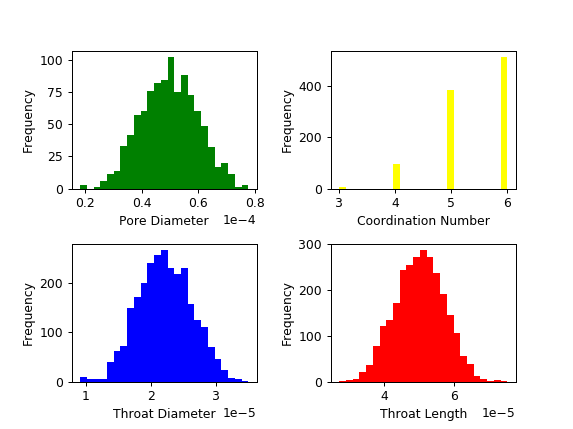

In [5]:
cubic['geo'].plot_histograms()

In [6]:
cubic['geo'].labels()

['pore.all', 'throat.all']

2017-09-08 09:37:39,812 | WARNING  | root._parse_labels | 'pore.internal' not found


<IPython.core.display.Javascript object>


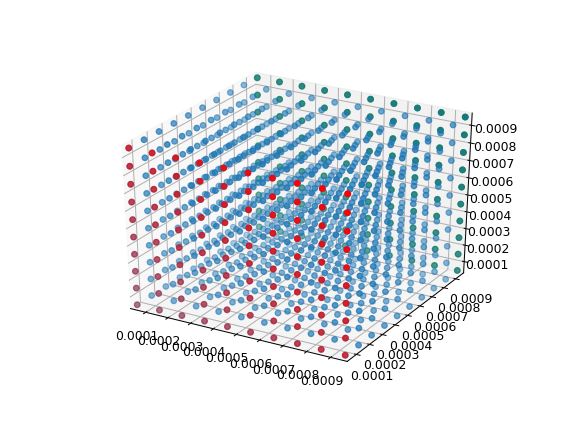

2017-09-08 09:37:40,177 | WARNING  | root._parse_labels | 'pore.left' not found
2017-09-08 09:37:40,179 | WARNING  | OpenPNM.Network.tools._scale_3d_axes | Axes is already scaled to previously plotted data
2017-09-08 09:37:40,184 | WARNING  | root._parse_labels | 'pore.right' not found
2017-09-08 09:37:40,186 | WARNING  | OpenPNM.Network.tools._scale_3d_axes | Axes is already scaled to previously plotted data


In [7]:
fig = pnm.Network.tools.plot_coordinates(network=cubic['geo'],pores=cubic['geo'].pores('internal'))
fig = pnm.Network.tools.plot_coordinates(network=cubic['geo'],pores=cubic['geo'].pores('left'),c='r',fig=fig)
fig = pnm.Network.tools.plot_coordinates(network=cubic['geo'],pores=cubic['geo'].pores('right'),c='g',fig=fig)

<IPython.core.display.Javascript object>


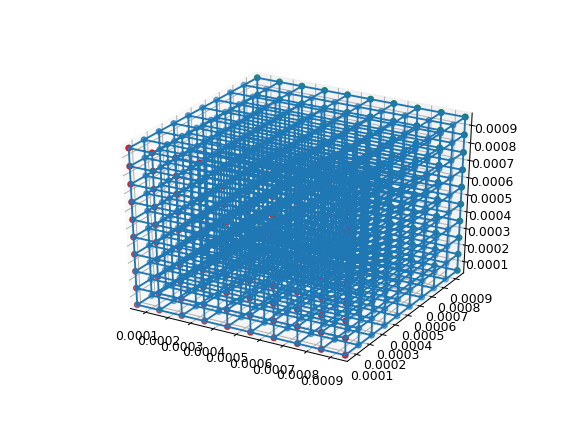

2017-09-08 09:37:40,256 | WARNING  | OpenPNM.Network.tools._scale_3d_axes | Axes is already scaled to previously plotted data
2017-09-08 09:37:40,263 | WARNING  | OpenPNM.Network.tools._scale_3d_axes | Axes is already scaled to previously plotted data
2017-09-08 09:37:40,267 | WARNING  | OpenPNM.Network.tools._scale_3d_axes | Axes is already scaled to previously plotted data


In [8]:
fig = pnm.Network.tools.plot_connections(network=cubic['network'])
fig = pnm.Network.tools.plot_coordinates(network=cubic['network'],pores=cubic['network'].pores('internal'), fig = fig)
fig = pnm.Network.tools.plot_coordinates(network=cubic['network'],pores=cubic['network'].pores('left'),c='r',fig=fig)
fig = pnm.Network.tools.plot_coordinates(network=cubic['network'],pores=cubic['network'].pores('right'),c='g',fig=fig)

## Setup and run MIP simulation

In [9]:
# Define phases
cubic['Hg']   = pnm.Phases.Mercury(network=cubic['network'],name='cubic:phase:Hg')
cubic['Air']  = pnm.Phases.Air(network=cubic['network'],name='cubic:phase:Air')
cubic['phys'] = pnm.Physics.Standard(network=cubic['network'], 
                                     phase=cubic['Hg'], pores=cubic['network'].Ps, throats=cubic['network'].Ts,
                                     name='cubic:PHYS')

<IPython.core.display.Javascript object>


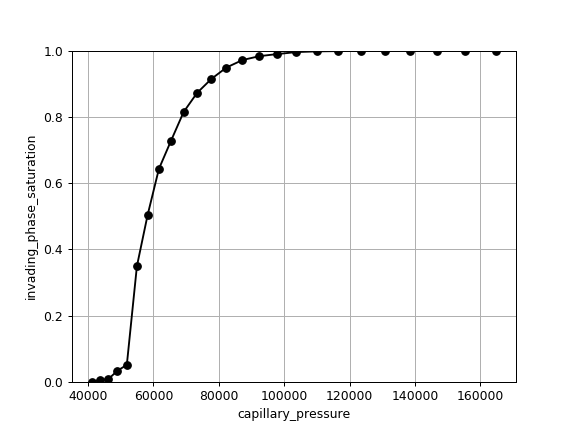

In [10]:
# Setup MIP simulation
cubic['MIP'] = pnm.Algorithms.Drainage(network=cubic['network'],name='cubic:ALG:MIP')
cubic['MIP'].setup(invading_phase=cubic['Hg'], defending_phase=cubic['Air'])
cubic['MIP'].set_inlets(pores=cubic['network'].pores(['left']))
cubic['MIP'].run()
fig = cubic['MIP'].plot_drainage_curve();

In [11]:
df = pd.DataFrame.from_dict(cubic['MIP'].get_drainage_data())
df

capillary_pressure  defending_phase_saturation  invading_phase_saturation
0         41177.466844                    1.000000                   0.000000
1         43625.292886                    0.994956                   0.005044
2         46218.631821                    0.992188                   0.007812
3         48966.133774                    0.967121                   0.032879
4         51876.963084                    0.949058                   0.050942
5         54960.828872                    0.650863                   0.349137
6         58228.017422                    0.496649                   0.503351
7         61689.426497                    0.356912                   0.643088
8         65356.601684                    0.272725                   0.727275
9         69241.774908                    0.185201                   0.814799
10        73357.905228                    0.127435                   0.872565
11        77718.722067                    0.085269                   0.914731
12        82338.771001                    0.050703                   0.949297
13        87233.462282                    0.028109                   0.971891
14        92419.122233                    0.016376                   0.983624
15        97913.047709                    0.010057                   0.989943
16       103733.563792                    0.003991                   0.996009
17       109900.084910                    0.002000                   0.998000
18       116433.179596                    0.001099                   0.998901
19       123354.639098                    0.000699                   0.999301
20       130687.550059                    0.000699                   0.999301
21       138456.371526                    0.000699                   0.999301
22       146687.016533                    0.000443                   0.999557
23       155406.938534                    0.000204                   0.999796
24       164645.222974                    0.000000                   1.000000

<IPython.core.display.Javascript object>


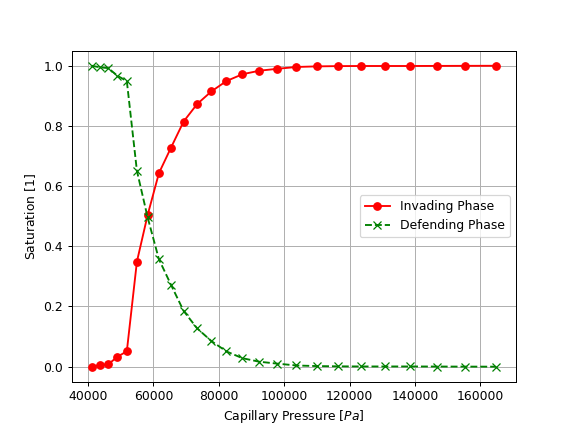

In [12]:
plt.figure()
plt.plot(df.capillary_pressure,df.invading_phase_saturation,'ro-',label='Invading Phase')
plt.plot(df.capillary_pressure,df.defending_phase_saturation,'gx--',label='Defending Phase')
plt.legend()

plt.xlabel('Capillary Pressure $[Pa]$')
plt.ylabel('Saturation $[1]$')
plt.grid()

### Export results for PostProcessing in Paraview

In [13]:
cubic['MIP'].return_results(Pc=cubic['MIP'].get_drainage_data()['capillary_pressure'][-1])
pnm.export_data(network=cubic['network'], filename='cubic_MIP')
df.to_csv('cubic_MIP.csv')

# Delaunay  Networks

In [14]:
pnm.clear()
delaunay = {}

## Create Topology and Geometry

Original Network Lables
------------------------------------------------------------
1	: pore.all
2	: throat.all
------------------------------------------------------------


<IPython.core.display.Javascript object>


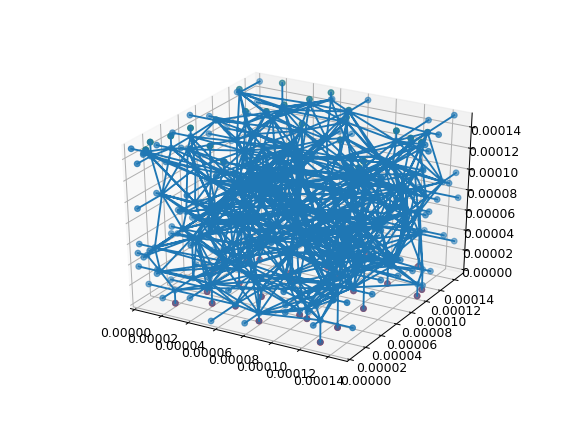

2017-09-08 09:37:43,781 | WARNING  | OpenPNM.Network.tools._scale_3d_axes | Axes is already scaled to previously plotted data
2017-09-08 09:37:43,787 | WARNING  | OpenPNM.Network.tools._scale_3d_axes | Axes is already scaled to previously plotted data
2017-09-08 09:37:43,791 | WARNING  | OpenPNM.Network.tools._scale_3d_axes | Axes is already scaled to previously plotted data


Network lables after boundaries were added
------------------------------------------------------------
1	: pore.all
2	: pore.back_boundary
3	: pore.bottom_boundary
4	: pore.boundary
5	: pore.front_boundary
6	: pore.left_boundary
7	: pore.right_boundary
8	: pore.top_boundary
9	: throat.all
10	: throat.boundary
------------------------------------------------------------


In [15]:
# Generate Geometry
delaunay['network'] = pnm.Network.Delaunay(num_pores=200, domain_size=[1.5e-4, 1.5e-4, 1.5e-4],name='Delaunay:TOP')

print("="*50,'\nOriginal Network Lables')
print(delaunay['network'].labels())

delaunay['network'].add_boundaries()

fig = pnm.Network.tools.plot_connections(network = delaunay['network']);
fig = pnm.Network.tools.plot_coordinates(network = delaunay['network'],fig=fig)
fig = pnm.Network.tools.plot_coordinates(network = delaunay['network'],fig=fig,
                                         pores=delaunay['network'].pores('bottom_boundary'),c='r')
fig = pnm.Network.tools.plot_coordinates(network = delaunay['network'],fig=fig,
                                         pores=delaunay['network'].pores('top_boundary'),c='g')

print("="*50,'\nNetwork lables after boundaries were added')
print(delaunay['network'].labels())

In [16]:
# Generate Geometry (Pore radii + fibre radii)
fibre_rad = 5e-6

Ps = delaunay['network'].pores()
Ts = delaunay['network'].find_neighbor_throats(pores=Ps, mode='intersection', flatten=True)

delaunay['geo'] = pnm.Geometry.Voronoi(network=delaunay['network'], pores=Ps, throats=Ts,
                                       fibre_rad=fibre_rad, voxel_vol=True,
                                       vox_len=1e-6, name='Delaunay:GEO')


2017-09-08 09:37:54,183 | WARNING  | Delaunay:TOP.check_network_health | 38 pores have no neighbors
2017-09-08 09:37:54,185 | WARNING  | Delaunay:TOP.check_network_health | Isolated clusters exist in the network
2017-09-08 09:37:54,195 | WARNING  | OpenPNM.Network.tools.trim | Isolated pores exist!  Run check_network_health to ID                         which pores to remove.
2017-09-08 09:37:54,199 | WARNING  | Delaunay:TOP.check_network_health | 38 pores have no neighbors
2017-09-08 09:37:54,202 | WARNING  | Delaunay:TOP.check_network_health | Isolated clusters exist in the network


<IPython.core.display.Javascript object>


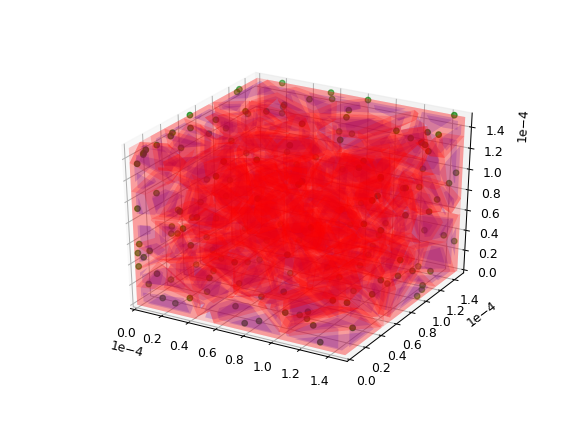

<IPython.core.display.Javascript object>


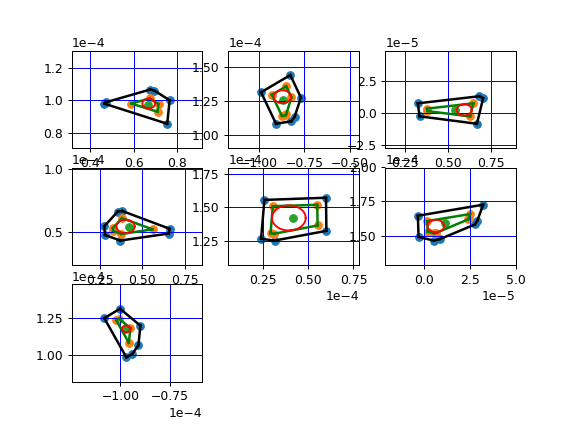

In [17]:
#plot all pores in the Voronoi geometry
import OpenPNM.Utilities.vertexops as vo

fig = vo.plot_pore(delaunay['geo'], delaunay['geo'].pores())
#fig = pnm.Network.tools.plot_connections(network = vor,fig=fig)
fig = pnm.Network.tools.plot_coordinates(network = delaunay['network'],
                                         fig=fig,pores=delaunay['network'].pores('boundary'),
                                         c='g')
throats = delaunay['network'].find_neighbor_throats(pores=[0])
#plot all throats connected to the first pore in the network
fig = vo.plot_throat(delaunay['geo'], throats)

<IPython.core.display.Javascript object>


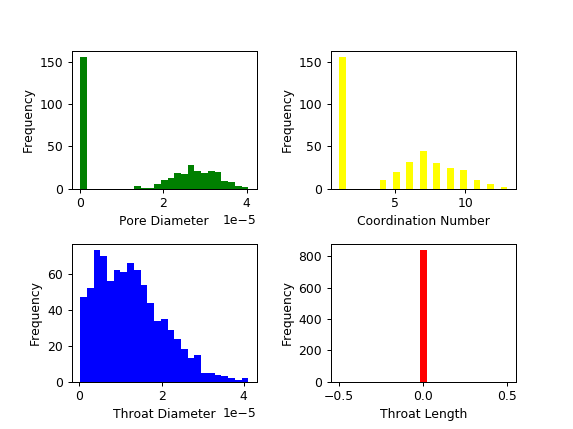

<IPython.core.display.Javascript object>


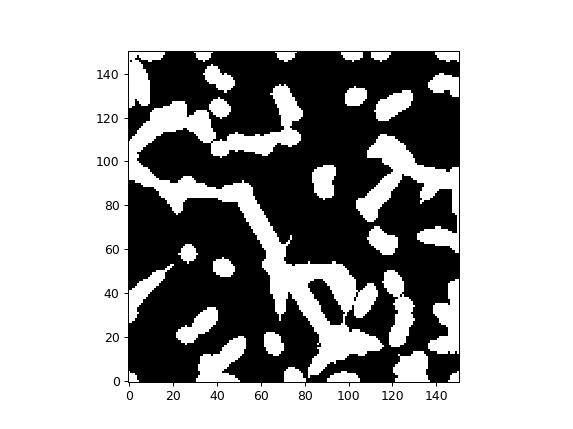

<IPython.core.display.Javascript object>


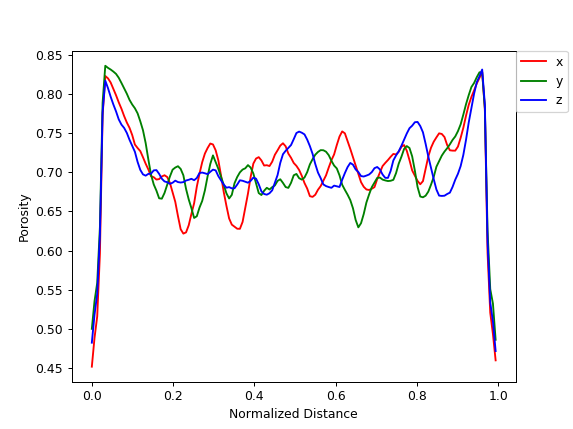

In [18]:
delaunay['geo'].plot_histograms()
delaunay['geo'].plot_fibre_slice(plane=[0.5,0,0])
delaunay['geo'].plot_porosity_profile();

In [19]:
print("="*50,'\nNetwork Lables')
print(delaunay['network'].labels())

print("="*50,'\nGeometry Properties')
print(delaunay['geo'].props())

Network Lables
------------------------------------------------------------
1	: pore.Delaunay:GEO
2	: pore.all
3	: pore.back_boundary
4	: pore.bottom_boundary
5	: pore.boundary
6	: pore.front_boundary
7	: pore.left_boundary
8	: pore.right_boundary
9	: pore.top_boundary
10	: throat.Delaunay:GEO
11	: throat.all
12	: throat.boundary
------------------------------------------------------------
Geometry Properties
------------------------------------------------------------
1	: pore.area
2	: pore.centroid
3	: pore.diameter
4	: pore.fibre_voxels
5	: pore.indiameter
6	: pore.pore_voxels
7	: pore.seed
8	: pore.vertices
9	: pore.volume
10	: throat.area
11	: throat.c2c
12	: throat.centroid
13	: throat.diameter
14	: throat.incentre
15	: throat.indiameter
16	: throat.length
17	: throat.normal
18	: throat.offset_vertices
19	: throat.perimeter
20	: throat.seed
21	: throat.shape_factor
22	: throat.surface_area
23	: throat.vertices
24	: throat.volume
---------------------------------------------------

## Setup Phases and Physics

In [20]:
# Define phases
delaunay['Hg']  = pnm.Phases.Mercury(network=delaunay['network'],name='Delaunay:Phase:Hg')
delaunay['Air'] = pnm.Phases.Air(network=delaunay['network'],name='Delaunay:Phase:Air')
delaunay['H2O'] = pnm.Phases.Water(network=delaunay['network'],name='Delaunay:Phase:H2O')

In [21]:
Ps = delaunay['network'].pores()
Ts = delaunay['network'].throats()

In [22]:
delaunay['phys_Hg'] = pnm.Physics.Standard(network=delaunay['network'], phase=delaunay['Hg'],
                                           pores=Ps, throats=Ts,
                                           dynamic_data=True,
                                           name='standard_Hg_physics')
delaunay['phys_Hg'].props()

['throat.capillary_pressure', 'throat.hydraulic_conductance']

In [23]:
delaunay['phys_H2O'] = pnm.Physics.Standard(network=delaunay['network'], phase=delaunay['H2O'],
                                            pores=Ps, throats=Ts,
                                            dynamic_data=True,
                                            name='standard_H2O_physics')
delaunay['phys_H2O'].props()

['throat.capillary_pressure', 'throat.diffusive_conductance', 'throat.hydraulic_conductance']

In [24]:
delaunay['phys_Air'] = pnm.Physics.Standard(network=delaunay['network'], phase=delaunay['Air'],
                                            pores=Ps, throats=Ts,
                                            dynamic_data=True,
                                            name='standard_Air_physics')
delaunay['phys_Air'].props()

['throat.diffusive_conductance', 'throat.hydraulic_conductance']

## MIP

In [25]:
delaunay['MIP'] = pnm.Algorithms.Drainage(network=delaunay['network'],name='Delaunay:Alg:MIP')
delaunay['MIP'].setup(invading_phase=delaunay['phys_Hg'], defending_phase=delaunay['phys_Air'])
delaunay['MIP'].set_inlets(pores=delaunay['network'].pores(['boundary']))

<IPython.core.display.Javascript object>


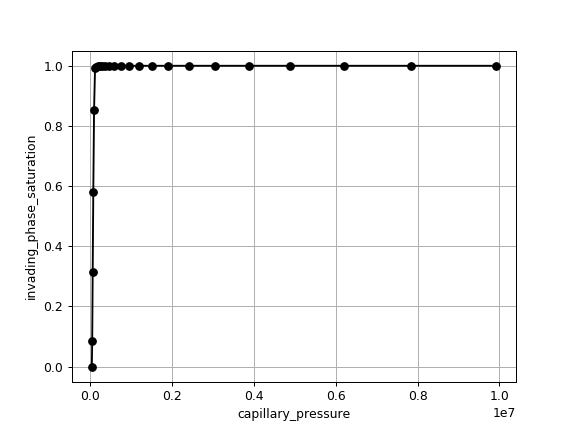

In [26]:
delaunay['MIP'].run()
fig = delaunay['MIP'].plot_drainage_curve();

In [27]:
df = pd.DataFrame.from_dict(delaunay['MIP'].get_drainage_data())
df

capillary_pressure  defending_phase_saturation  invading_phase_saturation
0         3.499635e+04                1.000000e+00                   0.000000
1         4.427820e+04                9.150253e-01                   0.084975
2         5.602181e+04                6.849513e-01                   0.315049
3         7.088009e+04                4.180897e-01                   0.581910
4         8.967914e+04                1.458456e-01                   0.854154
5         1.134641e+05                9.031286e-03                   0.990969
6         1.435575e+05                2.753907e-03                   0.997246
7         1.816322e+05               -2.220446e-16                   1.000000
8         2.298053e+05                0.000000e+00                   1.000000
9         2.907551e+05                0.000000e+00                   1.000000
10        3.678701e+05                0.000000e+00                   1.000000
11        4.654377e+05                0.000000e+00                   1.000000
12        5.888827e+05                0.000000e+00                   1.000000
13        7.450680e+05                0.000000e+00                   1.000000
14        9.426774e+05                0.000000e+00                   1.000000
15        1.192697e+06                0.000000e+00                   1.000000
16        1.509028e+06                0.000000e+00                   1.000000
17        1.909258e+06                0.000000e+00                   1.000000
18        2.415637e+06                0.000000e+00                   1.000000
19        3.056321e+06                0.000000e+00                   1.000000
20        3.866928e+06                0.000000e+00                   1.000000
21        4.892527e+06                0.000000e+00                   1.000000
22        6.190139e+06                0.000000e+00                   1.000000
23        7.831908e+06                0.000000e+00                   1.000000
24        9.909112e+06                0.000000e+00                   1.000000

<IPython.core.display.Javascript object>


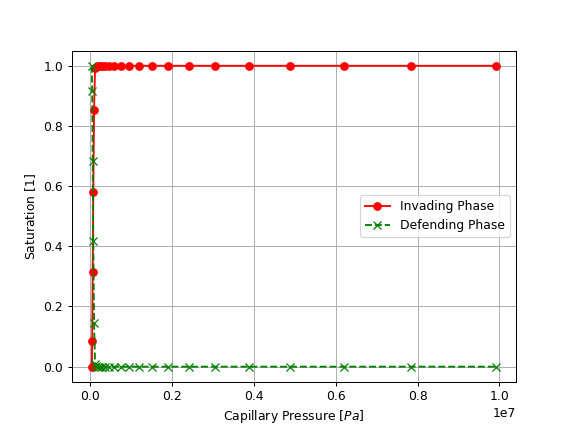

In [28]:
plt.figure()
plt.plot(df.capillary_pressure,df.invading_phase_saturation,'ro-',label='Invading Phase')
plt.plot(df.capillary_pressure,df.defending_phase_saturation,'gx--',label='Defending Phase')
plt.legend()

plt.xlabel('Capillary Pressure $[Pa]$')
plt.ylabel('Saturation $[1]$')
plt.grid()

In [29]:
delaunay['MIP'].return_results(Pc=delaunay['MIP'].get_drainage_data()['capillary_pressure'][-1])
pnm.export_data(network=delaunay['network'], filename='Voronoy_MIP')
df.to_csv('Voronoy_MIP.csv')

## Ordinary Percolation

In [30]:
inlets = delaunay['network'].pores('bottom_boundary')
# Using every other pore in the bottom and boundary as an inlet prevents
# extremely small diffusivity and permeability values in the z direction
used_inlets = [inlets[x] for x in range(0, len(inlets), 2)]

delaunay['Alg:OP'] = pnm.Algorithms.OrdinaryPercolation(network=delaunay['network'],
                                                        invading_phase=delaunay['H2O'],
                                                        defending_phase=delaunay['Air'],
                                                        name='Delaunay:Alg:OP')
delaunay['Alg:OP'].set_inlets(pores=used_inlets)
delaunay['Alg:OP'].run(npts=100)

<IPython.core.display.Javascript object>


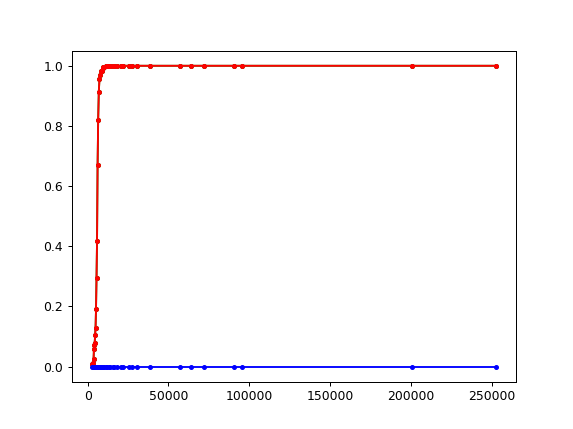

In [31]:
delaunay['Alg:OP'].plot_drainage_curve();

/home/andput/anaconda3/envs/py35/lib/python3.5/site-packages/OpenPNM/Algorithms/__OrdinaryPercolation__.py:408: RuntimeWarning: invalid value encountered in double_scalars
  Snwp_t[i] = sp.sum(Tvol[t_inv[throats] <= Pc]) / Tvol_tot


<IPython.core.display.Javascript object>


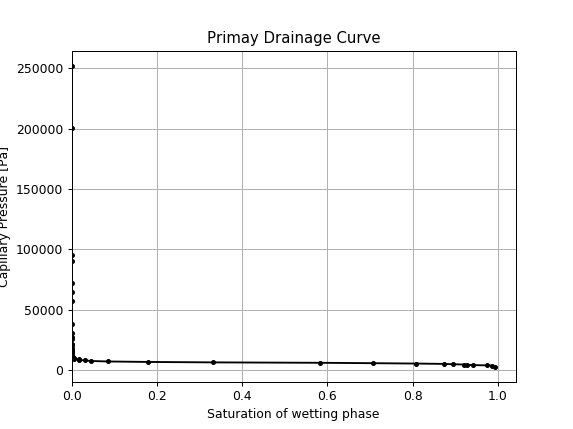

In [32]:
delaunay['Alg:OP'].plot_primary_drainage_curve();

In [33]:
delaunay['Alg:OP'].return_results(sat=1.0)

2017-09-08 09:38:08,430 | ERROR    | Delaunay:Phase:H2O.__setitem__ | pore.occupancy is already defined in at least one                                  associated Physics object
2017-09-08 09:38:08,432 | ERROR    | Delaunay:Phase:H2O.__setitem__ | throat.occupancy is already defined in at least one                                  associated Physics object


<IPython.core.display.Javascript object>


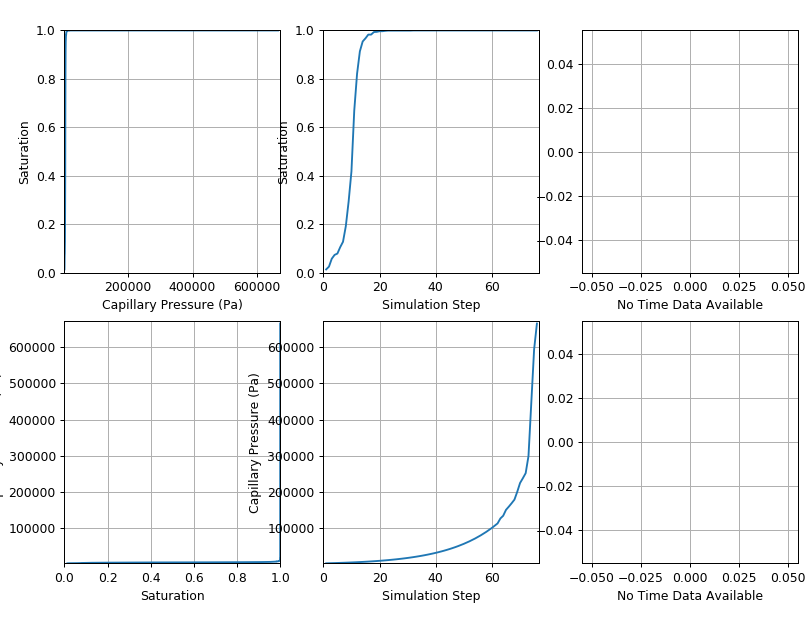

In [34]:
fig=plt.figure(figsize=(9,7))
pnm.Postprocessing.Plots.drainage_curves(delaunay['Alg:OP'], timing=None, fig=fig);

In [35]:
pnm.export_data(network=delaunay['network'], filename='Voronoy_OP')